# EXERCISE — Intro to scientific computing

To jump into programming with Python, we'll make some **reflection coefficients**.

Before coming into the Notebook, spend some time in an interactive session learning about sequences (strings, lists), and doing basic indexing, slicing, `append()`, `in`, etc. Then you can come in here.

## Lists

We are going to make a little earth model. We'll go from interval properties (velocity and density) to interface properties at the boundaries between rocks.

### Q. Start by making two lists of numbers of the same length — in the range [2000,3000].

In [1]:
velocity = [ 2300, 2350, 2700, 2600, 2750, 3500 ]
density = [ 2550, 2500, 2400, 2800, 2900, 3000 ]

Now we compute acoustic impedance by stepping over the two lists at the same time. We'll store the result for now as a list called `layers`.

In [2]:
list(zip(velocity, density))

[(2300, 2550),
 (2350, 2500),
 (2700, 2400),
 (2600, 2800),
 (2750, 2900),
 (3500, 3000)]

In [3]:
layers = []

for j in range(len(velocity)):
    vp = velocity[j]
    rho = density[j]
    layers.append(vp * rho)


In [4]:
layers

[5865000, 5875000, 6480000, 7280000, 7975000, 10500000]

We imagine these as properties of rock layers. We want to do computations on the interfaces, doing operations on 'upper' and 'lower' layers.

### Q. Form the expression for the 'lower' layers.

In [5]:
uppers = layers[:-1]
lowers = layers[1:]

### Q. Form the expression for refectivity coefficients.

$$ R = \frac{lower - upper}{lower + upper} $$

In [8]:
rcs

[0.0008517887563884157,
 0.04896802913800081,
 0.05813953488372093,
 0.04555883316945264,
 0.13667117726657646]

In [10]:
for r in rcs:
    print("rc %.4f" % r)

rc 0.0009
rc 0.0490
rc 0.0581
rc 0.0456
rc 0.1367


In [15]:
for r in rcs:
    print("{0:>12s} {1:.4f}".format('rc', r))

          rc 0.0009
          rc 0.0490
          rc 0.0581
          rc 0.0456
          rc 0.1367


### Q. Can you rewrite that `for` loop as a list comprehension?

In [7]:
rcs = []
for l, u in zip(lowers, uppers):
    rc = (l - u) / (l + u)
    rcs.append(rc)

In [31]:
for n in range(10):
    print(n)

0
1
2
3
4
5
6
7
8
9


In [43]:
def sum(aa, bb):
    return aa + bb

In [34]:
sum(8, 9)

17

In [36]:
w = "don't"
string = """and now
it can contain
newlines
"""

In [39]:
print(string)

and now
it can contain
newlines



In [42]:
rcs = [(l - u) / (l + u) for l, u in zip(lowers, uppers)]

## Functions

Definition, inputs, side-effects, returning, scope, docstrings

In [47]:
# Exercise
def compute_rc(layers):
    """
    Computes reflection coefficients given
    a list of layer impedances.
    """
    uppers = layers[:-1]
    lowers = layers[1:]
    rcs = [(l-u)/(l+u) for l, u in zip(lowers, uppers)]
    
    return rcs

In [48]:
compute_rc(layers)

[0.0008517887563884157,
 0.04896802913800081,
 0.05813953488372093,
 0.04555883316945264,
 0.13667117726657646]

Put in a file and import into a new notebook

## Numpy

**Before continuing, do some basic NumPy array stuff in the interpreter.**

Let's make a really big 'log' from random numbers:

In [49]:
import numpy as np  # Just like importing file

In [50]:
biglog = np.random.random(10000000)
%timeit compute_rc(biglog)

1 loop, best of 3: 4.14 s per loop


Note that the log has to be fairly big for the benchmarking to work properly, because otherwise the CPU caches the computation and this skews the results.

Now we can re-write our function using arrays instead of lists.

In [56]:
# Exercise
def compute_rc_vector(layers):

    layers = np.array(layers)

    upper = layers[:-1]
    lower = layers[1:]
    
    rcs = (lower - upper) / (lower + upper)
    
    return rcs

In [57]:
compute_rc_vector(layers)

array([ 0.00085179,  0.04896803,  0.05813953,  0.04555883,  0.13667118])

In [58]:
%timeit compute_rc_vector(biglog)

1 loop, best of 3: 220 ms per loop


In [59]:
4.14/0.22

18.818181818181817

60 times faster on my machine!

## Plotting basics

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Not we can only plot part of `biglog` because it contains too many points for `matplotlib` (and for our screen!). If we really wanted to plot it, we'd have to find a way to upscale it.

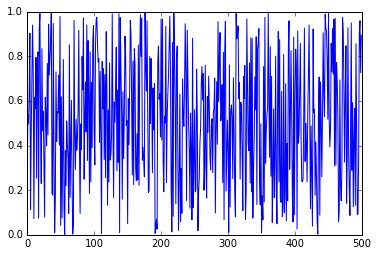

In [70]:
plt.plot(biglog[:500])
plt.savefig('myfile.svg', dpi=400)
plt.show()

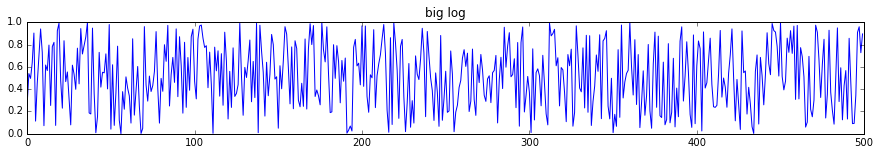

In [71]:
fig = plt.figure(figsize=(15,2))
ax = fig.add_subplot(111)
ax.plot(biglog[:500])
ax.set_title("big log")

plt.show()

### Q. Try setting the x and y axis titles, changing colours, adding a legend, etc.

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>